# Dataset Link: https://www.kaggle.com/mloey1/ahcd1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import random
from pathlib import Path
import os

from sklearn.utils import shuffle
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model

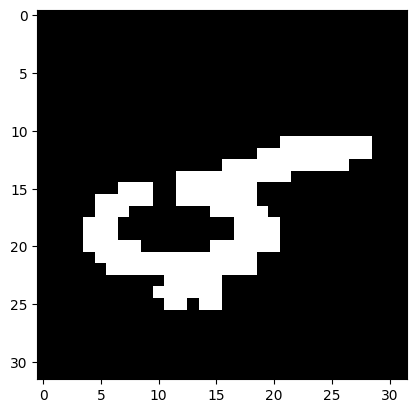

In [2]:
''' reading an image '''
img = cv.imread("arabic characters dataset/Test Images 3360x32x32/test/id_1007_label_28.png")

''' resizing an image '''
img = cv.resize(img, (32,32))

''' plotting an image '''
plt.imshow(img)

In [3]:
''' reading data of train data '''
train_df_images = pd.read_csv('arabic characters dataset/csvTrainImages 13440x1024.csv')
train_df_label = pd.read_csv('arabic characters dataset/csvTrainLabel 13440x1.csv')

''' reading data of test data '''
test_df_images = pd.read_csv('arabic characters dataset/csvTestImages 3360x1024.csv')
test_df_label = pd.read_csv('arabic characters dataset/csvTestLabel 3360x1.csv')

''' shape of data '''
print(train_df_images.shape, train_df_label.shape, test_df_images.shape, test_df_label.shape)

(13439, 1024) (13439, 1) (3359, 1024) (3359, 1)


In [4]:
train_df_images.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
''' Validation data '''
rand = random.sample(train_df_images.index.tolist(), 500)

val_df_images = pd.DataFrame(train_df_images.iloc[rand, :].values)
val_df_labels = pd.DataFrame(train_df_label.iloc[rand, :].values)

In [6]:
''' converting train data images into numpy array'''
X_train = train_df_images.to_numpy()
y_train = train_df_label.to_numpy()

''' converting validation data images into numpy array'''
X_valid = val_df_images.to_numpy()
y_valid = val_df_labels.to_numpy()

''' converting test data images into numpy array'''
X_test = test_df_images.to_numpy()
y_test = test_df_label.to_numpy()

''' Number of classes '''
num_classes = len(np.unique(y_train)) + 1
num_classes

''' converting labels of train, test, and val into to_categorical '''
y_train = to_categorical(y_train,num_classes)
y_valid = to_categorical(y_valid,num_classes)
y_test = to_categorical(y_test,num_classes)


In [7]:
''' Shape of train, test and val data '''
print("Training shape: ",X_train.shape)
print("Validation shape: ",X_valid.shape)
print("Testing shape: ",X_test.shape)

Training shape:  (13439, 1024)
Validation shape:  (500, 1024)
Testing shape:  (3359, 1024)


In [8]:
''' reshaping images '''
X_train = X_train.reshape([-1, 32, 32, 1])
X_test = X_test.reshape([-1, 32, 32, 1])
X_valid = X_valid.reshape([-1, 32, 32, 1])

In [9]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [10]:
''' Model '''

''' container '''
model = Sequential()

''' 1st Convolutional Layer '''
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=2))

''' 2nd Convolutional Layer '''
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

''' 3rd Convolutional Layer '''
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

''' flattening the output '''
model.add(Flatten())

'''1st Hidden layer '''
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

''' 2nd Hidden layer '''
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

''' Classification layer '''
model.add(Dense(num_classes,activation='softmax'))

''' Compile the model '''
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [11]:
''' training '''
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=5,batch_size=32)

Epoch 1/5
420/420 [==============================] - 34s 74ms/step - loss: 2.0856 - accuracy: 0.4467 - val_loss: 0.4733 - val_accuracy: 0.8320
Epoch 2/5
420/420 [==============================] - 29s 70ms/step - loss: 0.6825 - accuracy: 0.7730 - val_loss: 0.2968 - val_accuracy: 0.9100
Epoch 3/5
420/420 [==============================] - 27s 65ms/step - loss: 0.4494 - accuracy: 0.8493 - val_loss: 0.1450 - val_accuracy: 0.9520
Epoch 4/5
420/420 [==============================] - 30s 70ms/step - loss: 0.3342 - accuracy: 0.8907 - val_loss: 0.1783 - val_accuracy: 0.9480
Epoch 5/5
420/420 [==============================] - 33s 79ms/step - loss: 0.2642 - accuracy: 0.9106 - val_loss: 0.1720 - val_accuracy: 0.9440


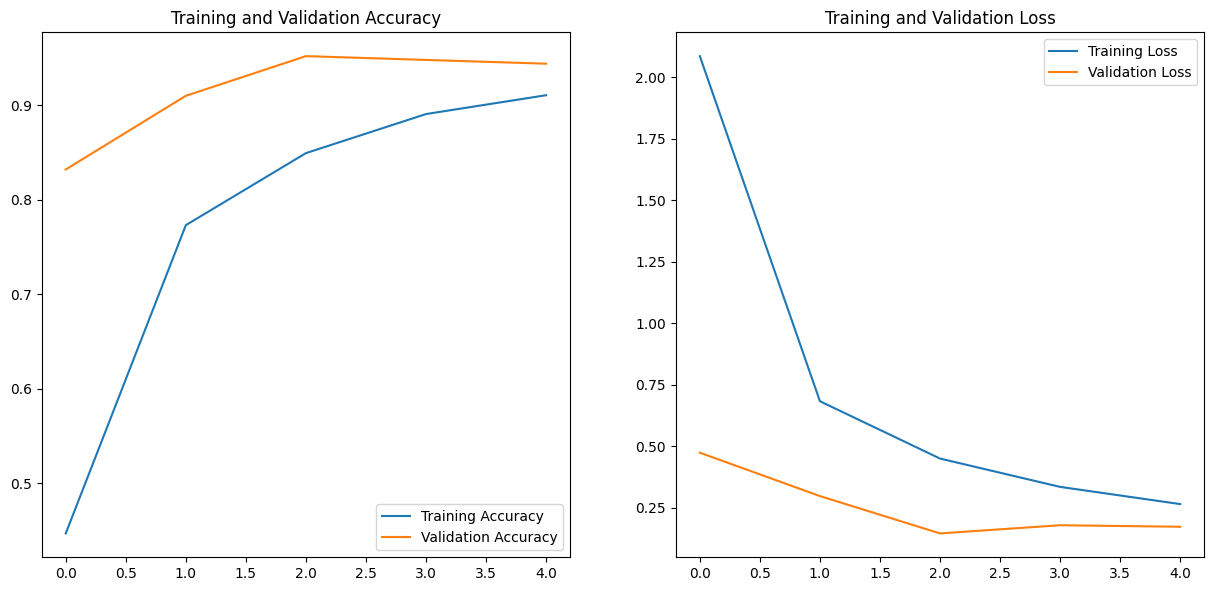

In [12]:
epochs_range = range(5)

''' training accuracy and validation accuracy graph '''
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' training loss and validation loss graph '''
plt.subplot(2, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
''' evaluating the model '''
model.evaluate(X_test,y_test,batch_size=32)

105/105 [==============================] - 2s 15ms/step - loss: 0.3853 - accuracy: 0.8785


[0.38528284430503845, 0.878535270690918]

Arabic alphabet:
ي و ه ن م ل ك ق ف غ ع ظ ط ض ص ش س ز ر ذ د خ ح ج ث ت ب ا
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28

1/1 [==============================] - 0s 240ms/step
Predicted index:  [3, 6, 28, 6, 2, 17, 14, 21, 20, 15]

Real index:  [3, 6, 28, 6, 2, 17, 14, 21, 20, 15]


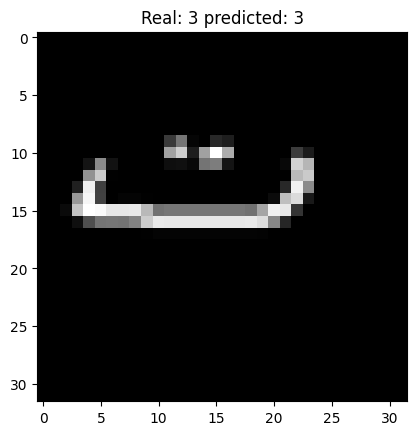

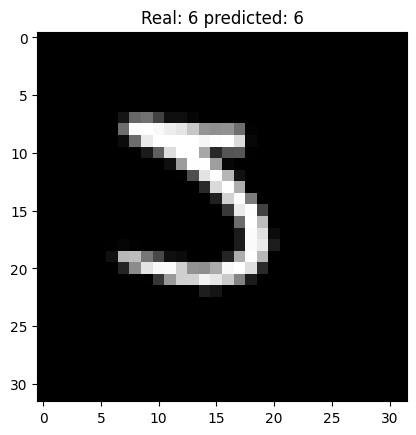

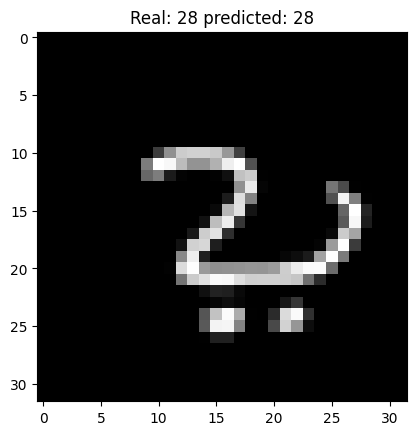

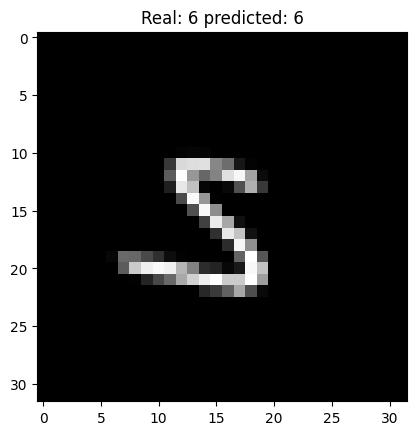

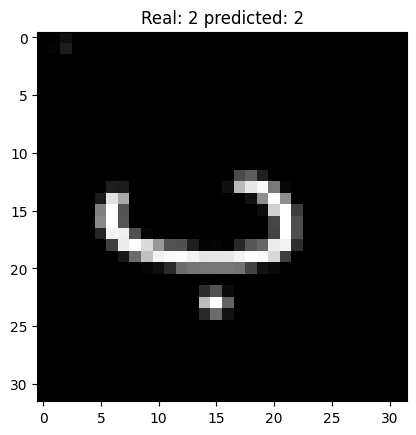

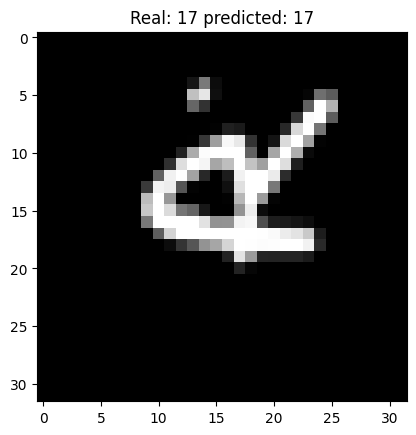

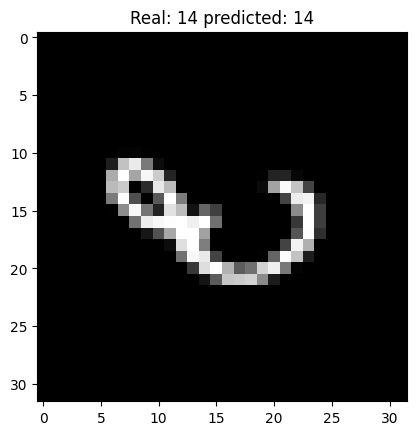

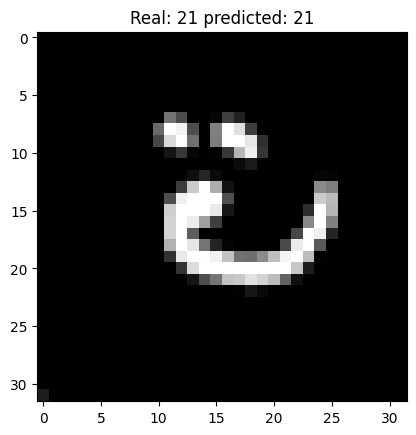

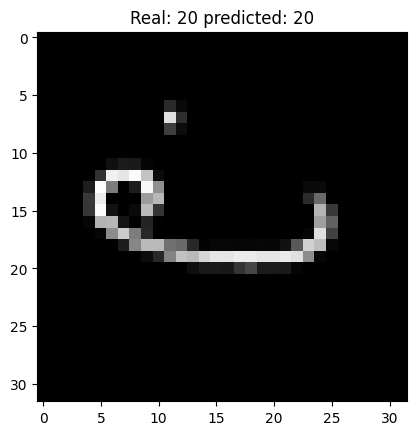

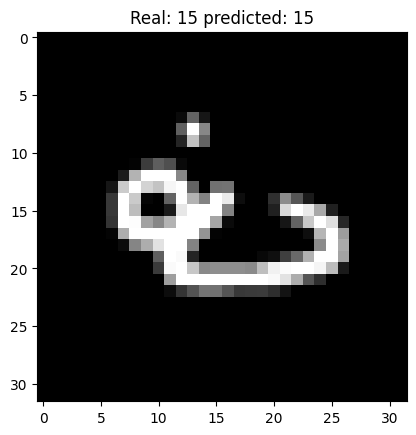

In [14]:
''' prediction '''

''' shuffling of images and labels '''
X_test, y_test = shuffle(X_test, y_test, random_state=30)

''' taking only first 10 images '''
y_test = y_test[:10]
X_test = X_test[:10]

''' Print the arabic alphabet'''
print('Arabic alphabet:')
print("ي و ه ن م ل ك ق ف غ ع ظ ط ض ص ش س ز ر ذ د خ ح ج ث ت ب ا\n1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28")
print()

'''Predict on the test data '''
pred = model.predict(X_test)

''' creating dataframe'''
pred_df = pd.DataFrame(pred)

''' Get the index of the max probability from the output Data frame'''
pred_idx = list(pred_df.idxmax(axis=1))

'''Print the predicted index'''
print("Predicted index: ", pred_idx)
print()

''' creating data frame for test data '''
y_test = pd.DataFrame(y_test)
actual_idx = list(y_test.idxmax(axis=1))

'''Print the real index'''
print("Real index: ", actual_idx)

''' plotting '''
for i in range(len(X_test)):
    actual = actual_idx[i]
    pred = pred_idx[i]
    plt.title(f'Real: {actual} predicted: {pred}')
    img = X_test[i]
    ''' rotating images '''
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    plt.imshow(img,cmap='gray')
    plt.show()